In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_extra
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\marketing_campaign.csv", sep="\t")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed')
df['ID'] = df['ID'].astype(str)
df.drop(df.columns[15:29], axis=1, inplace=True)
df['Age']=2014-df['Year_Birth']
df.drop('Year_Birth',axis=1, inplace=True)
df['Num_Kids'] = df['Kidhome'] + df['Teenhome']
df['Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Num_Kids,Amount
0,5524,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,57,0,1617
1,2174,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,60,2,27
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,49,0,776
3,6182,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,30,1,53
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,33,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,47,1,1341
2236,4001,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,68,3,444
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,33,0,1241
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,58,1,843


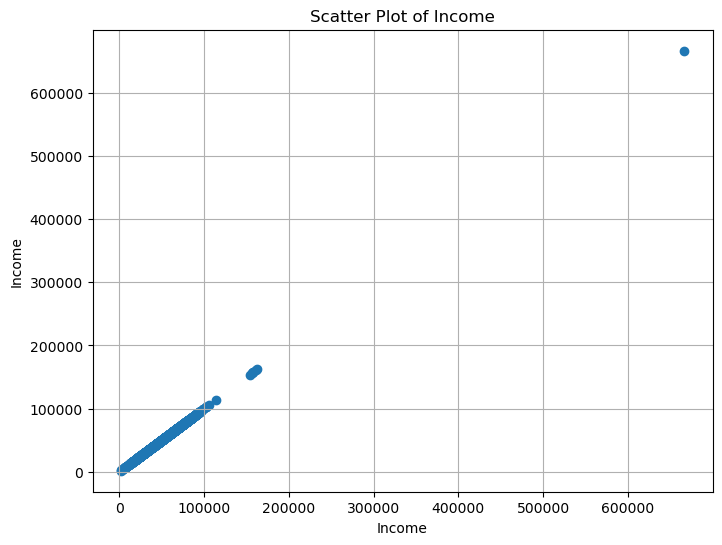

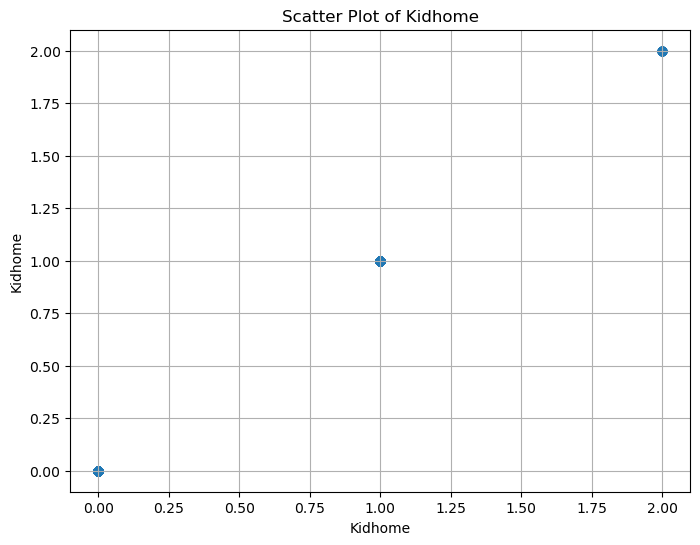

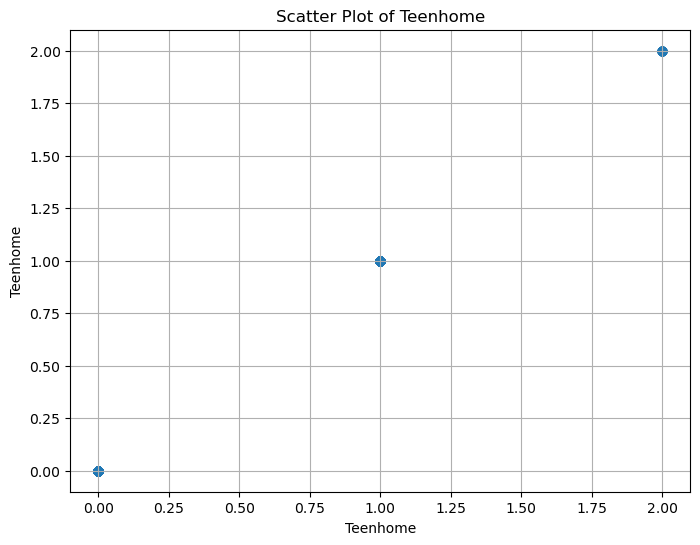

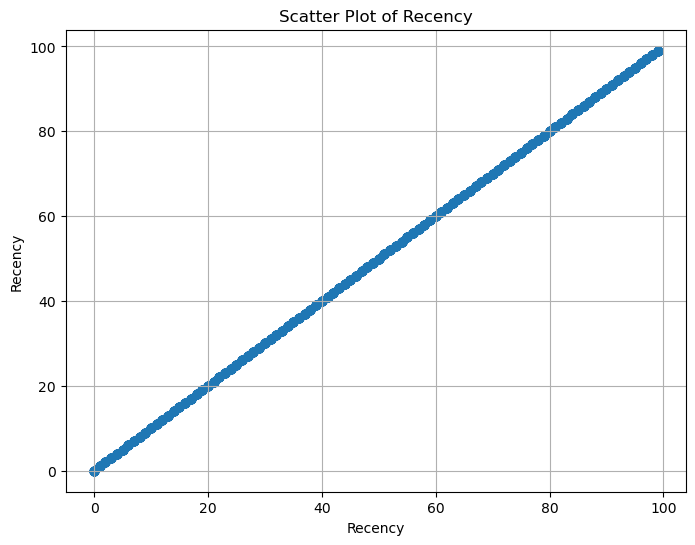

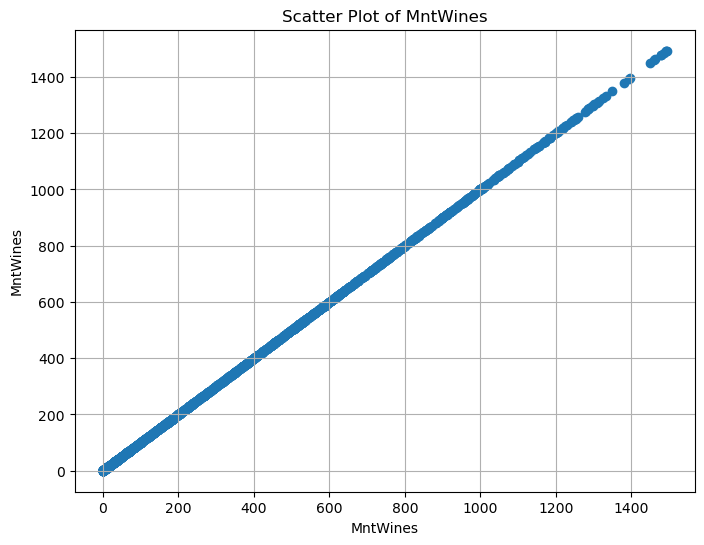

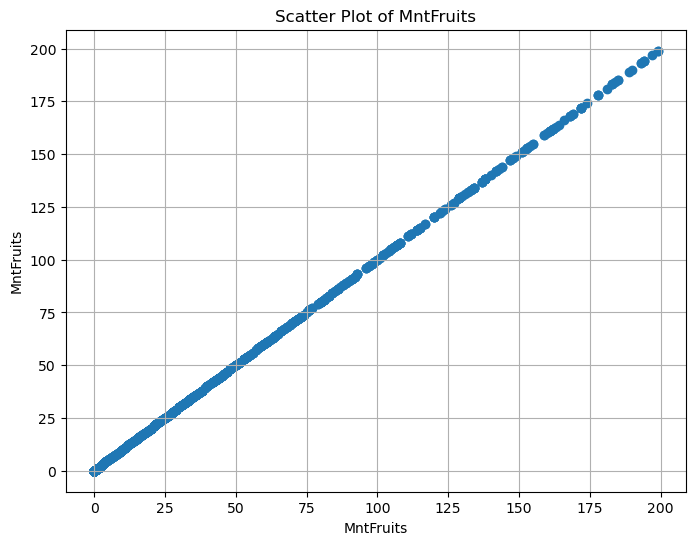

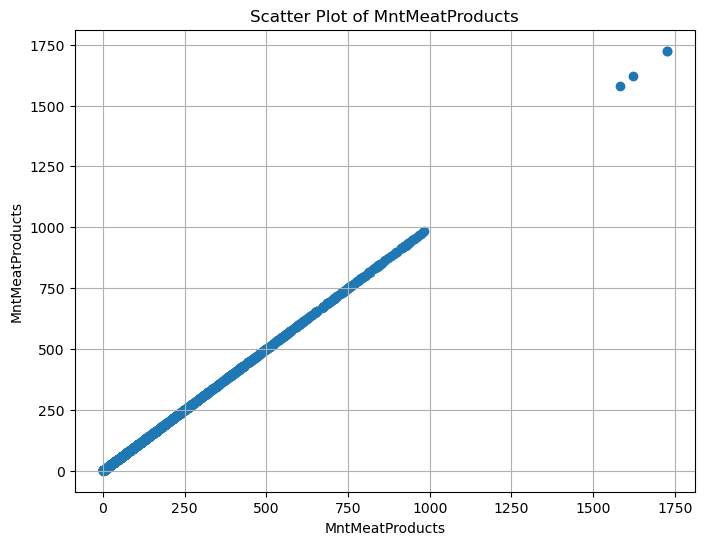

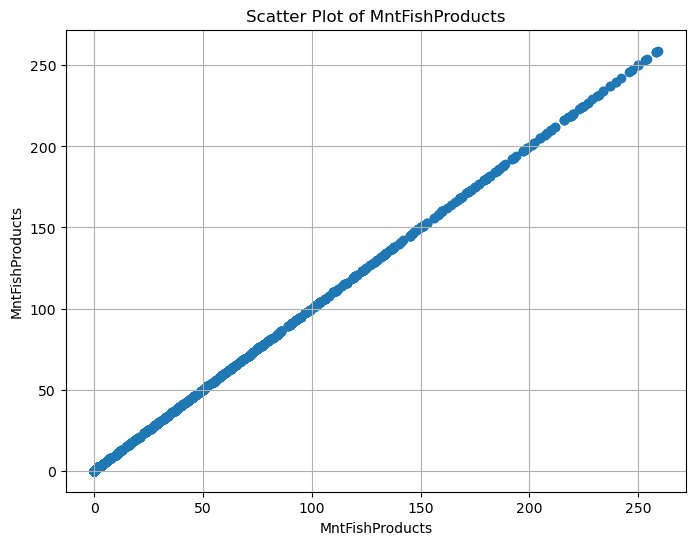

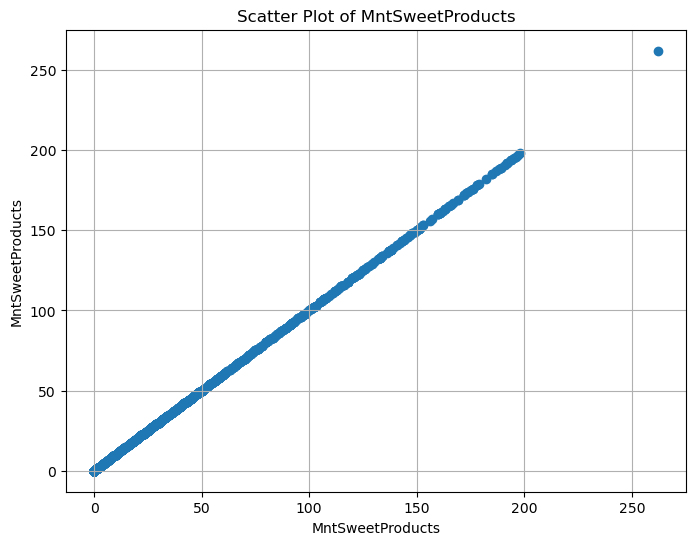

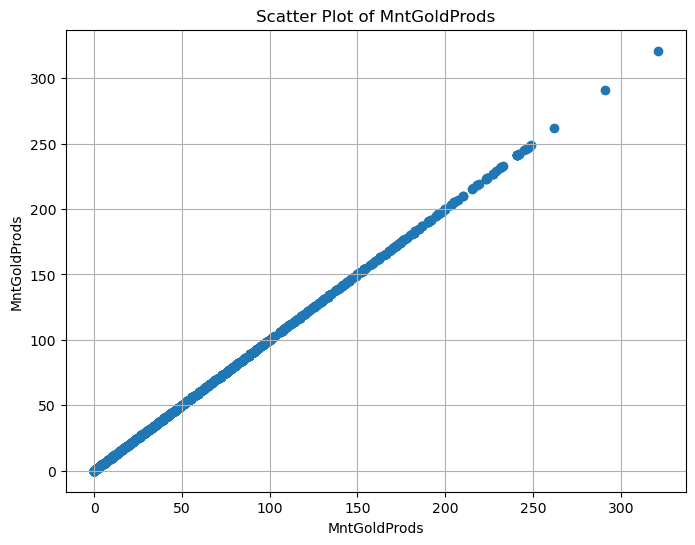

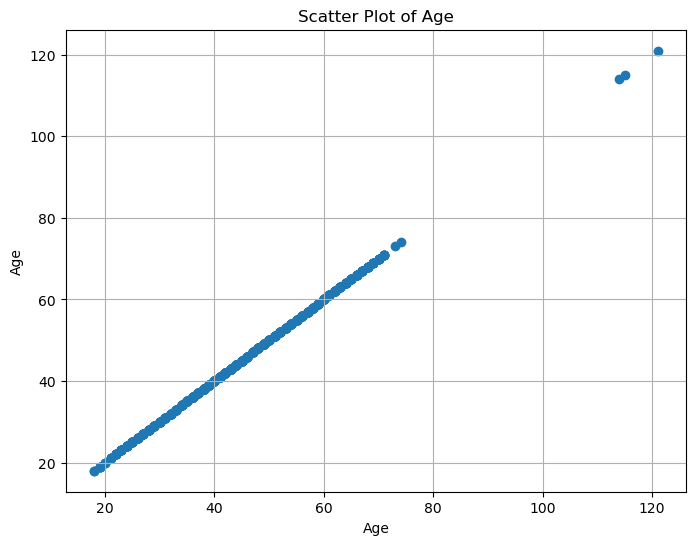

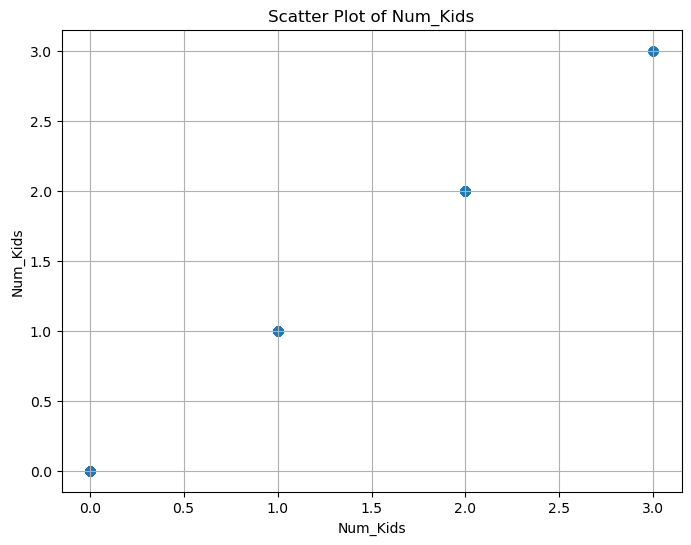

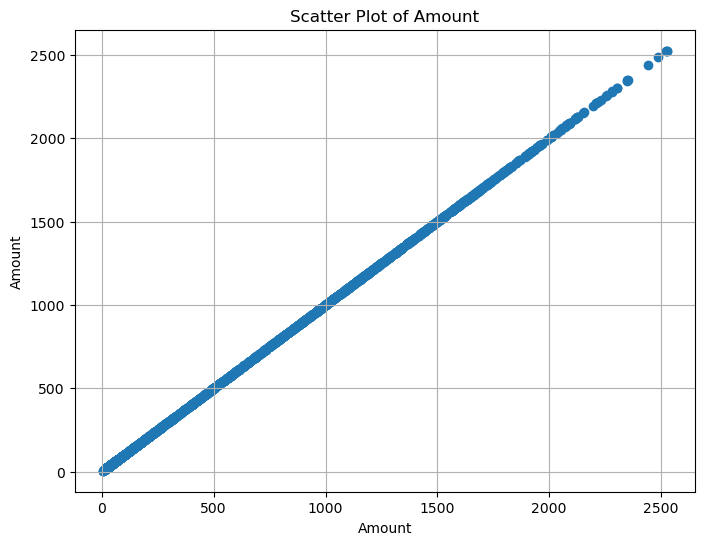

In [7]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df[column])
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel(column)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [8]:
#removing outliers
df = df[(df["Age"]<90)]
df = df[(df["Income"]<150000)]
df = df[(df["MntMeatProducts"]<1500)]
df = df[(df["MntSweetProducts"]<250)]

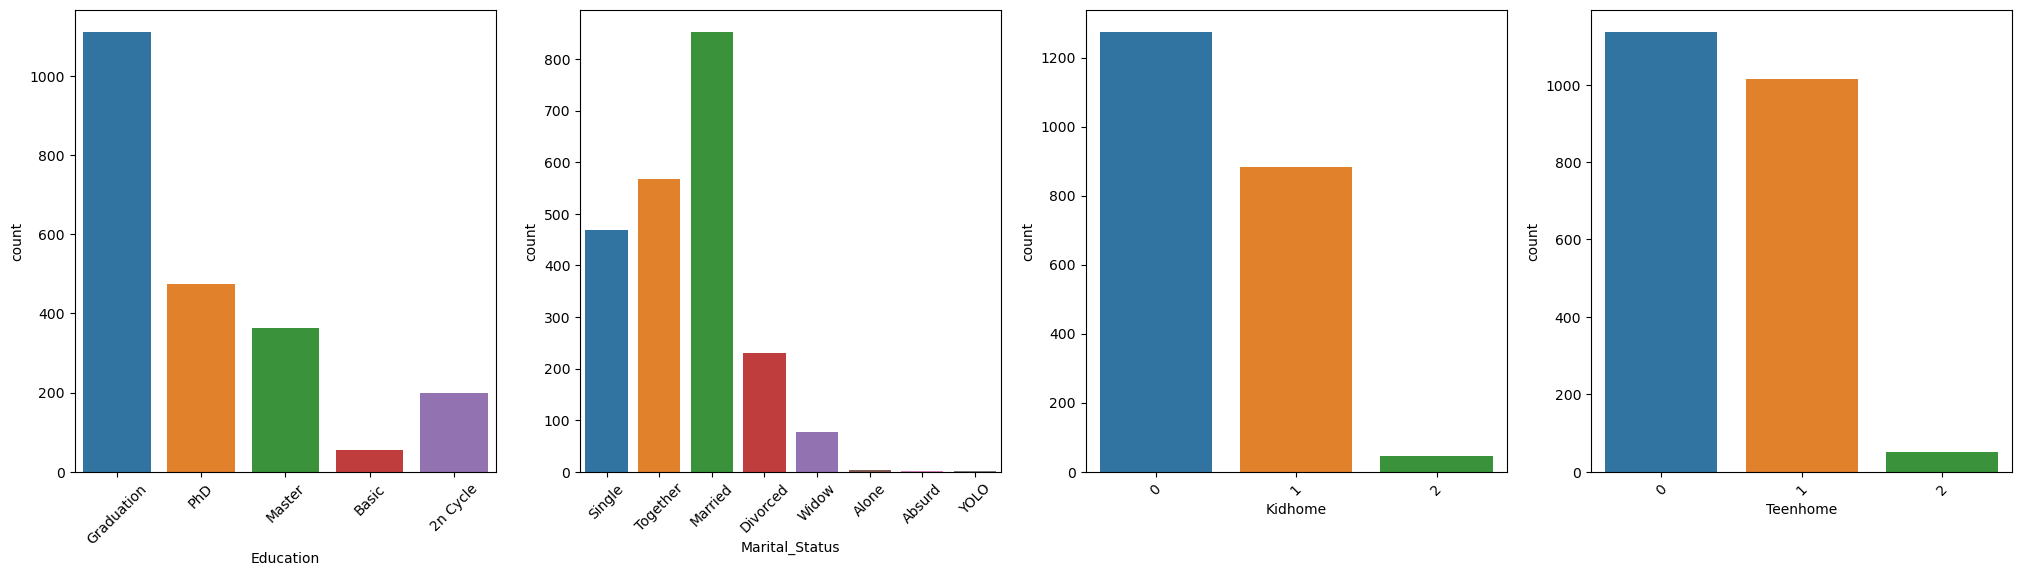

In [9]:
cal_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=df, x=col[1], ax=ax[col[0]])
    # rotate the x-axis labels
    # ax[col[0]].xticks(rotation=45)
    ax[col[0]].tick_params(axis='x', rotation=45)

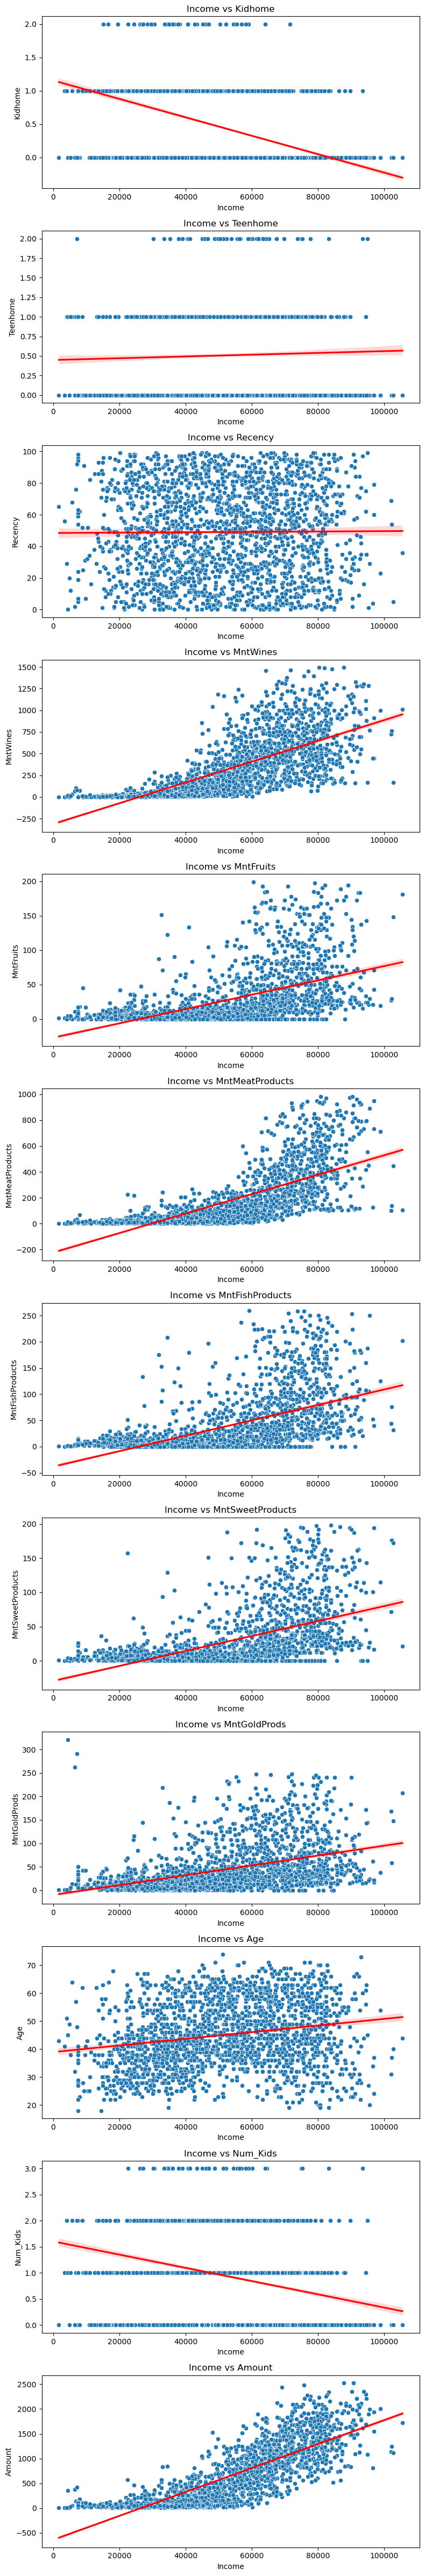

In [10]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Income'])

# Create subplots for Income vs all other numerical features
fig, axes = plt.subplots(nrows=numerical_df.shape[1], ncols=1, figsize=(8, 4 * numerical_df.shape[1]))

for i, column in enumerate(numerical_df.columns):
    sns.scatterplot(x='Income', y=column, data=df, ax=axes[i])
    axes[i].set_title(f"Income vs {column}")
    sns.regplot(x='Income', y=column, data=df, scatter=False, ax=axes[i], color='r')

plt.tight_layout()
plt.show()

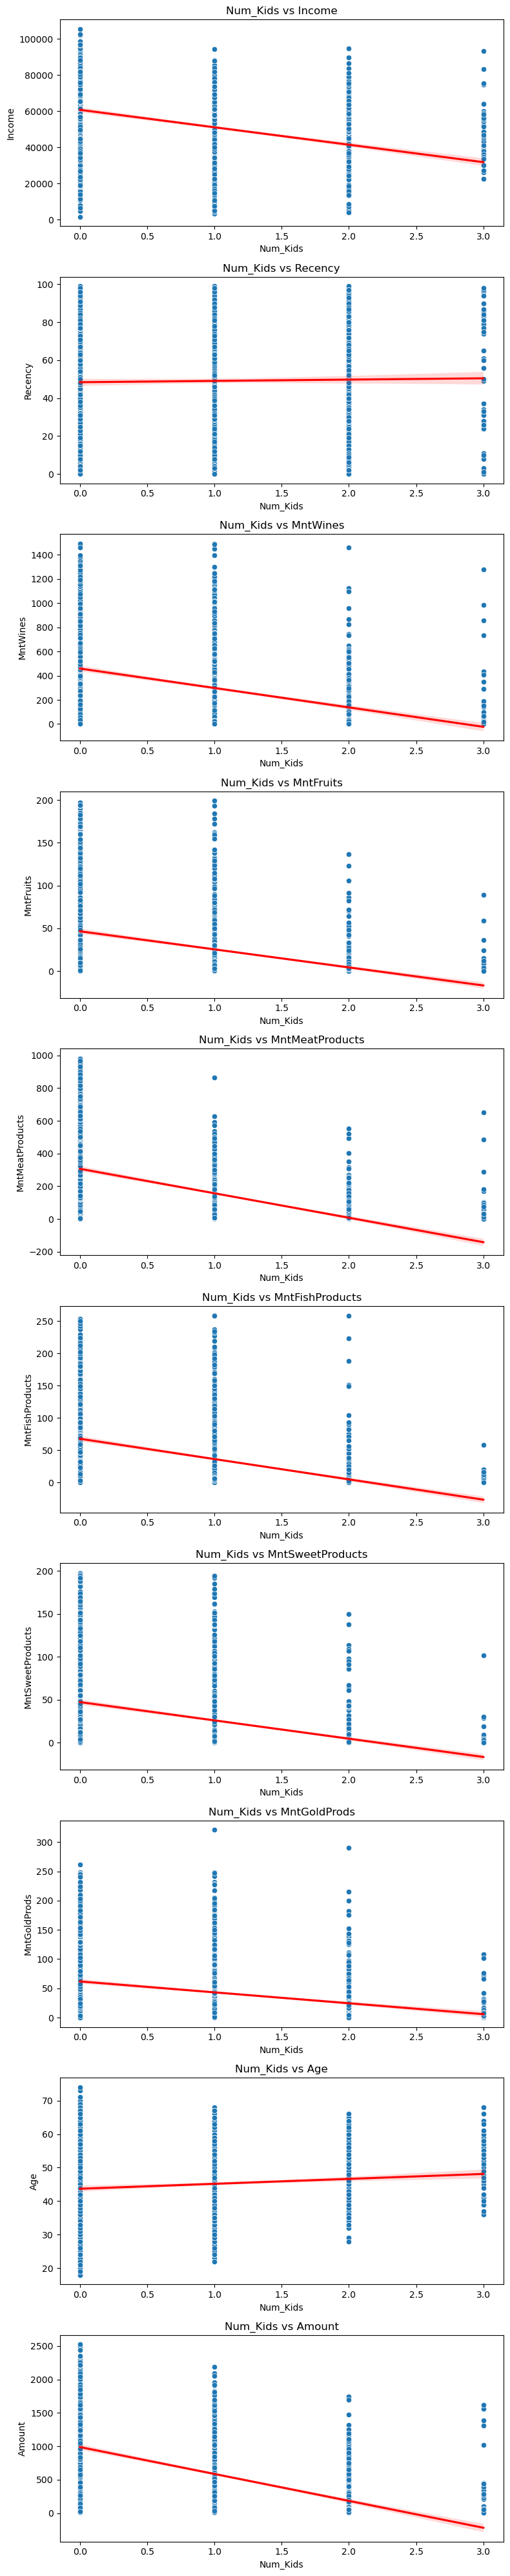

In [11]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Num_Kids', 'Kidhome', 'Teenhome'])

# Create subplots for Income vs all other numerical features
fig, axes = plt.subplots(nrows=numerical_df.shape[1], ncols=1, figsize=(8, 4 * numerical_df.shape[1]))

for i, column in enumerate(numerical_df.columns):
    sns.scatterplot(x='Num_Kids', y=column, data=df, ax=axes[i])
    axes[i].set_title(f"Num_Kids vs {column}")
    sns.regplot(x='Num_Kids', y=column, data=df, scatter=False, ax=axes[i], color='r')

plt.tight_layout()
plt.show()

In [12]:
numerical_df.shape

(2203, 10)

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

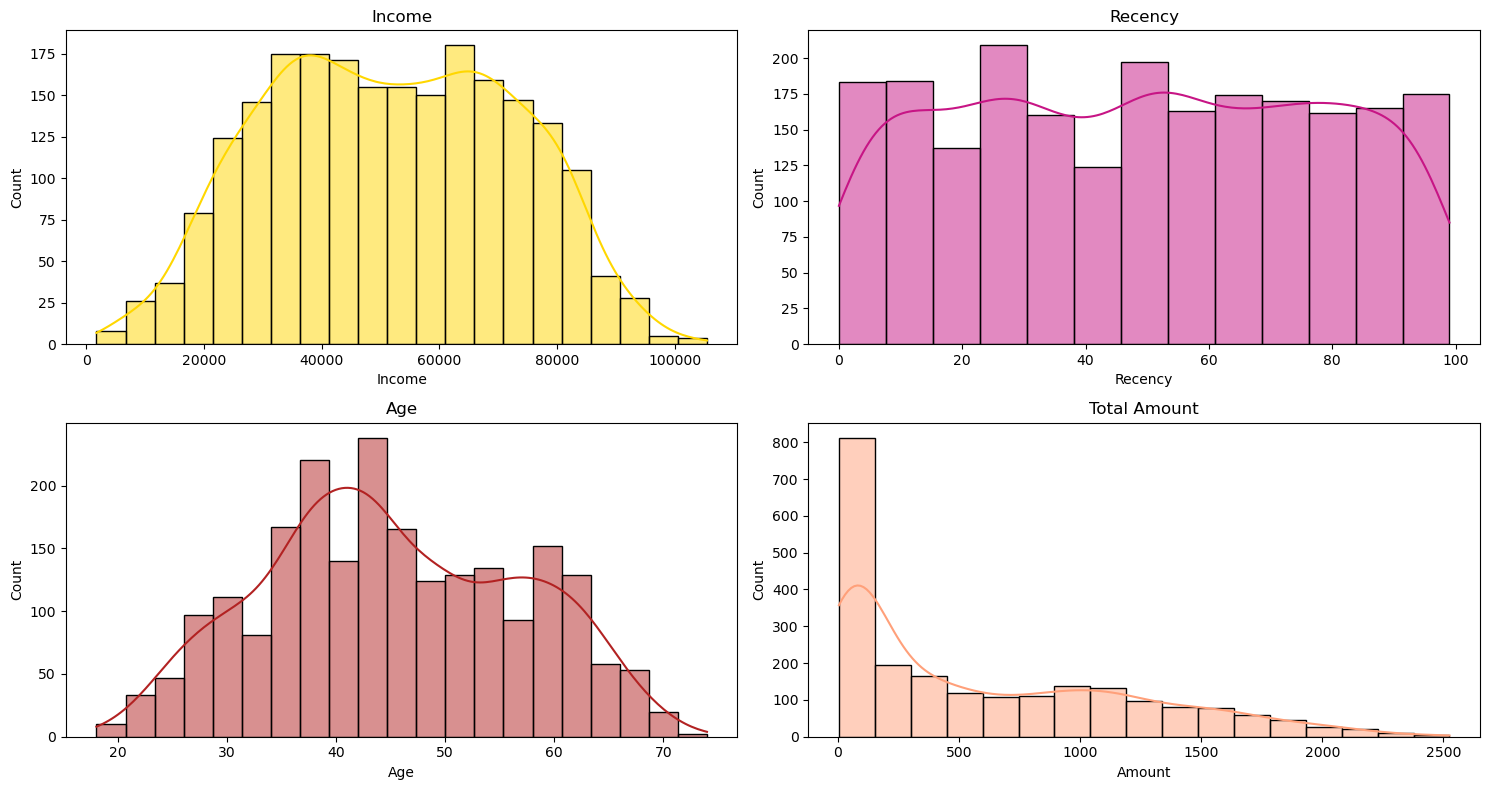

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(data=df, x='Income', kde=True, color='gold', ax=axs[0][0])
axs[0][0].set_title('Income')

sns.histplot(data=df, x='Recency', kde=True, color='mediumvioletred', ax=axs[0][1])
axs[0][1].set_title('Recency')

sns.histplot(data=df, x='Age', kde=True, color='firebrick', ax=axs[1][0])
axs[1][0].set_title('Age')

sns.histplot(data=df, x='Amount', kde=True, color='lightsalmon', ax=axs[1][1])
axs[1][1].set_title('Total Amount')


plt.tight_layout()


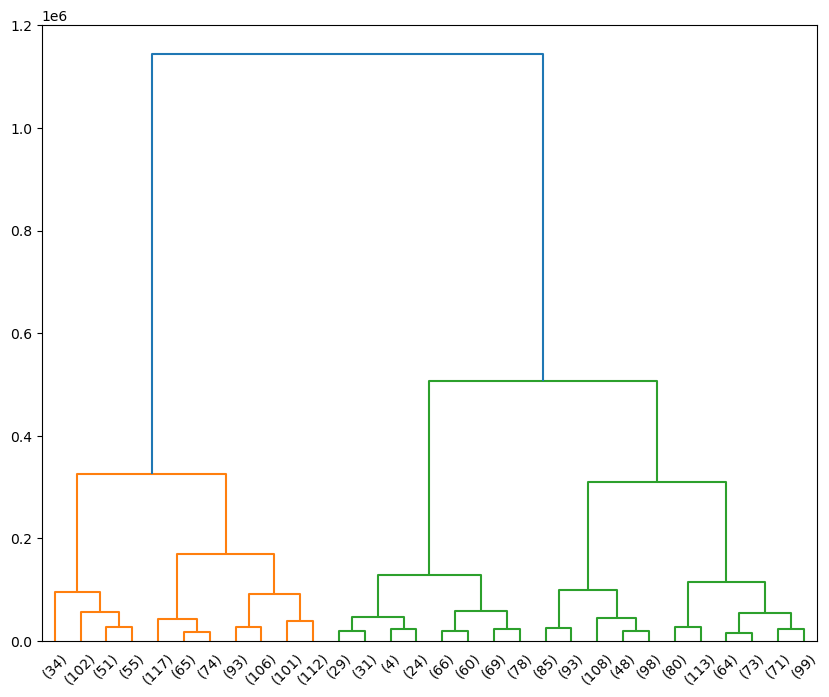

In [15]:
linkage_matrix = hierarchy.linkage(numerical_df, method='ward')
plt.figure(figsize=(10,8))
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=30)

In [16]:
numerical_columns['ID'] = df['ID']
numerical_columns.set_index('ID', inplace=True)

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)
k = 3
kmedoids = KMedoids(n_clusters=k, random_state=0)
kmedoids.fit(scaled_data)
numerical_columns['Cluster_Id'] = kmedoids.labels_
numerical_columns.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Num_Kids,Amount,Cluster_Id
ID,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,57,0,1617,0
2174,46344.0,1,1,38,11,1,6,2,1,6,60,2,27,2
4141,71613.0,0,0,26,426,49,127,111,21,42,49,0,776,0
6182,26646.0,1,0,26,11,4,20,10,3,5,30,1,53,1
5324,58293.0,1,0,94,173,43,118,46,27,15,33,1,422,1


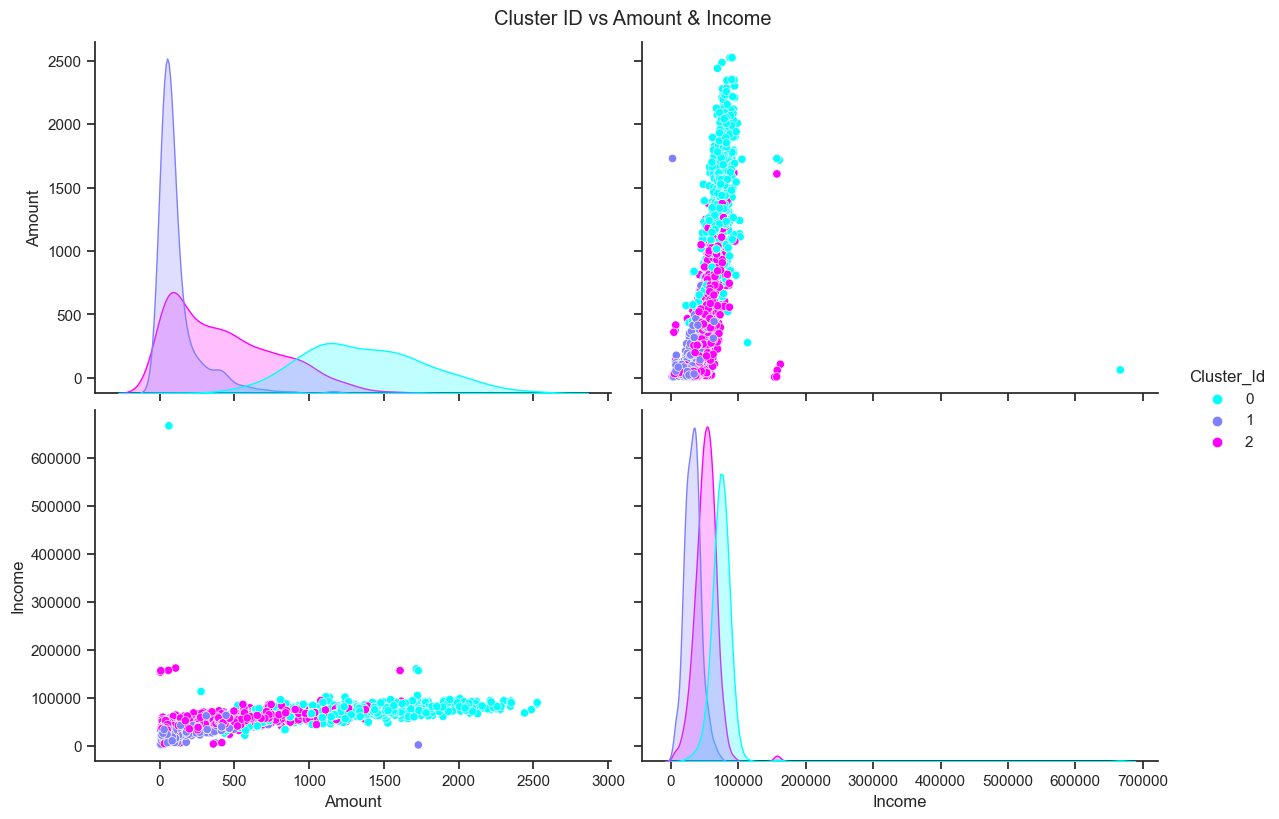

In [18]:
sns.set(style="ticks")
sns.pairplot(numerical_columns, hue='Cluster_Id', vars=['Amount', 'Income'], palette='cool', height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Income', y=1.02)
plt.show()

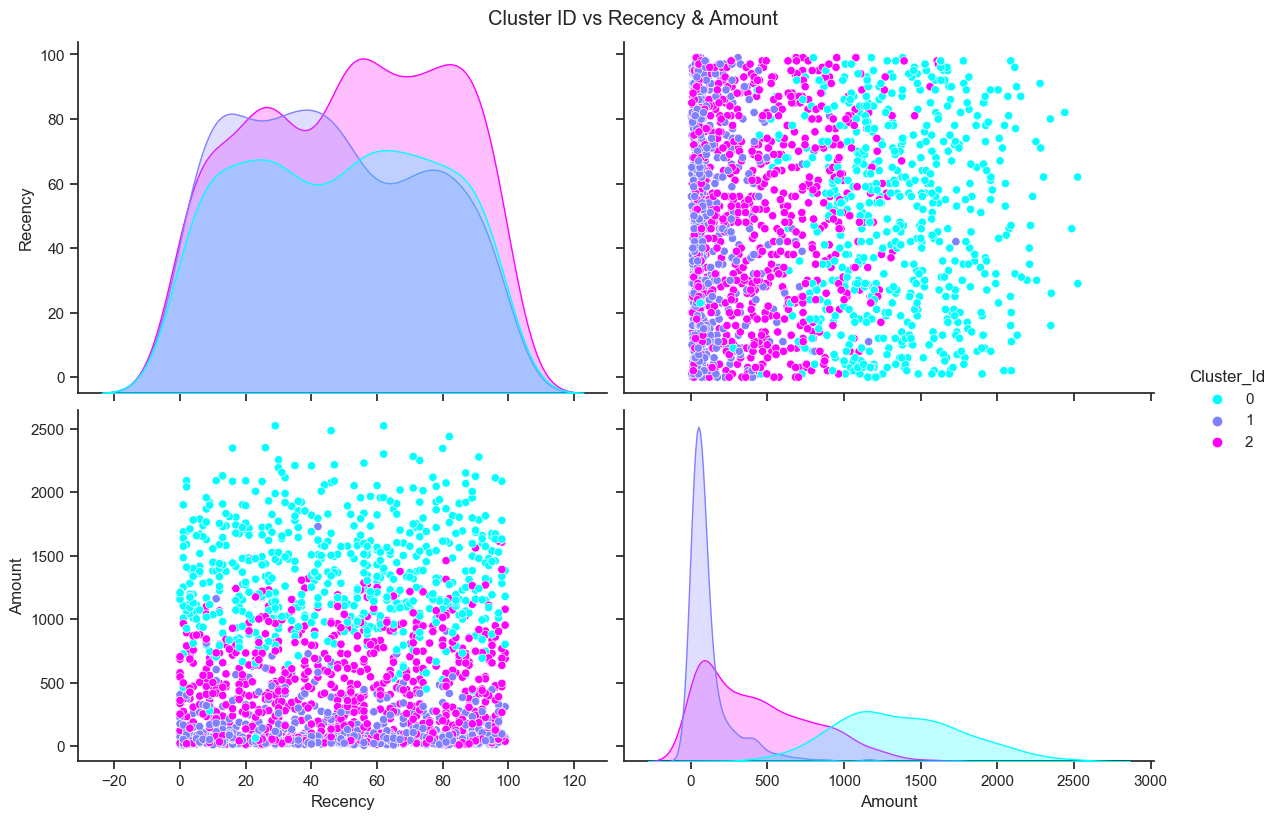

In [19]:
sns.set(style="ticks")
sns.pairplot(numerical_columns, hue='Cluster_Id', vars=['Recency', 'Amount'], palette='cool', height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Recency & Amount', y=1.02)
plt.show()

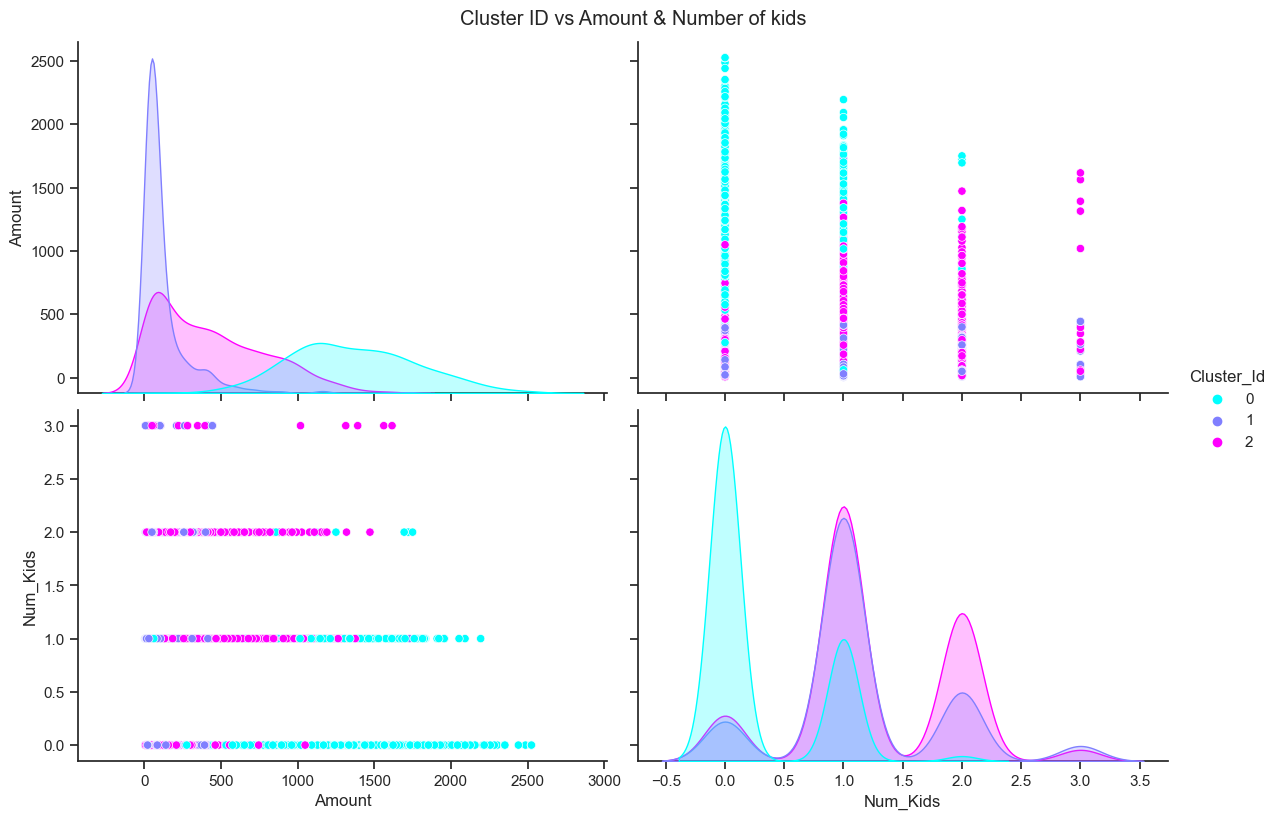

In [20]:
sns.set(style="ticks")
sns.pairplot(numerical_columns, hue='Cluster_Id', vars=['Amount', 'Num_Kids'], palette='cool', height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Number of kids', y=1.02)
plt.show()

In [21]:
cols = ['ID','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','Age', 'Num_Kids', 'Amount']
df = pd.merge(numerical_columns, df, on=cols , how='inner')

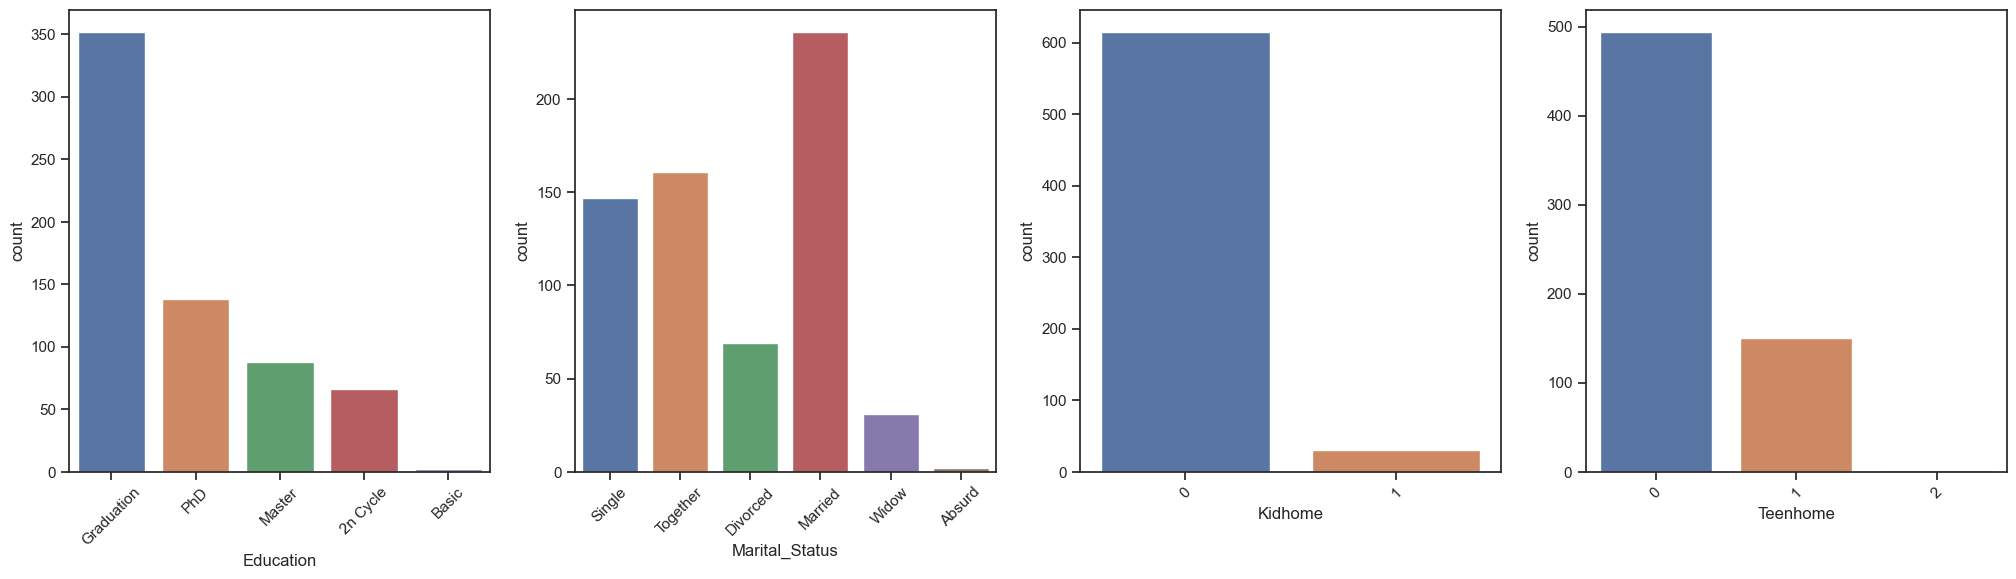

In [22]:
cluster0_df = df[df['Cluster_Id'] == 0]

cal_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=cluster0_df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

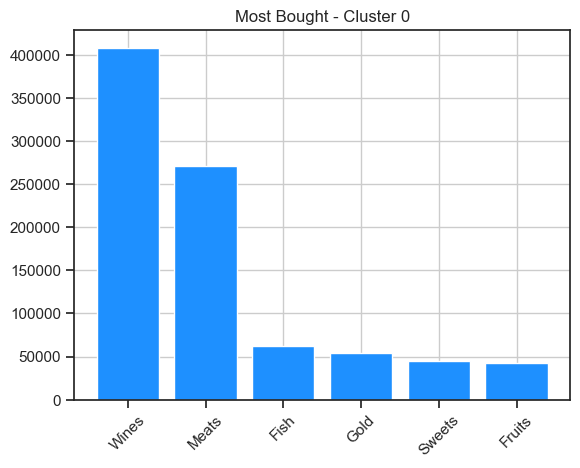

In [23]:
col_sum = cluster0_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=0).sort_values(ascending=False)

plt.bar(col_sum.index, col_sum.values, color='dodgerblue')
plt.title("Most Bought - Cluster 0")
plt.xticks(col_sum.index,['Wines', 'Meats', 'Fish', 'Gold', 'Sweets', 'Fruits'],rotation=45)

plt.grid(True)
plt.show()

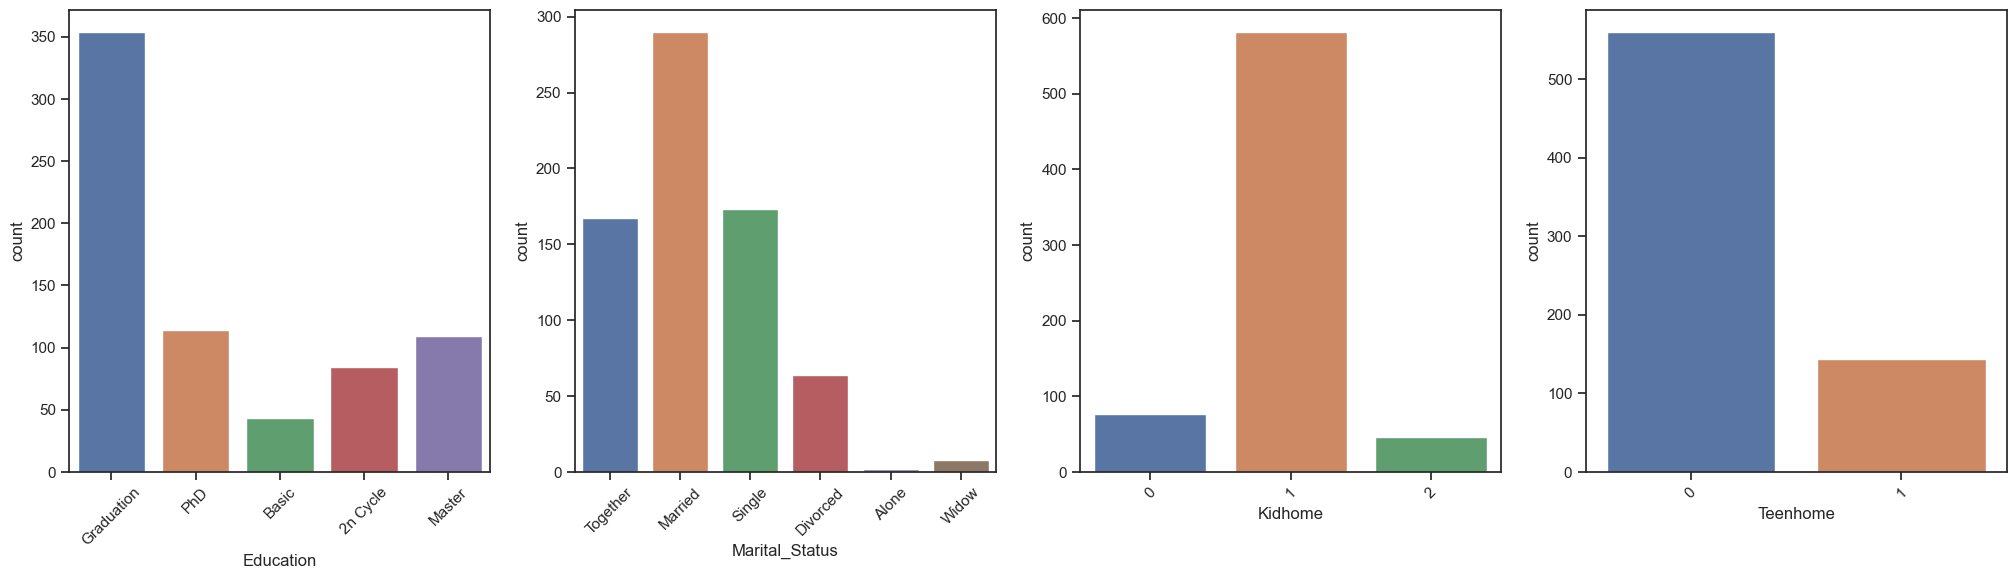

In [24]:
cluster1_df = df[df['Cluster_Id'] == 1]

fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=cluster1_df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

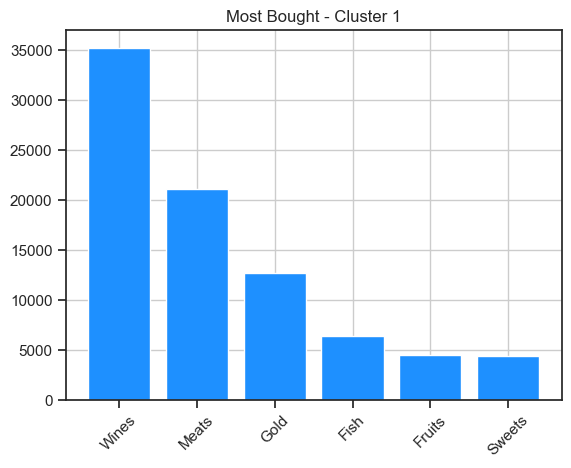

In [26]:
col_sum = cluster1_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=0).sort_values(ascending=False)

plt.bar(col_sum.index, col_sum.values, color='dodgerblue')
plt.title("Most Bought - Cluster 1")
plt.xticks(col_sum.index,['Wines', 'Meats', 'Gold', 'Fish', 'Fruits', 'Sweets'],rotation=45)
plt.grid(True)

plt.show()

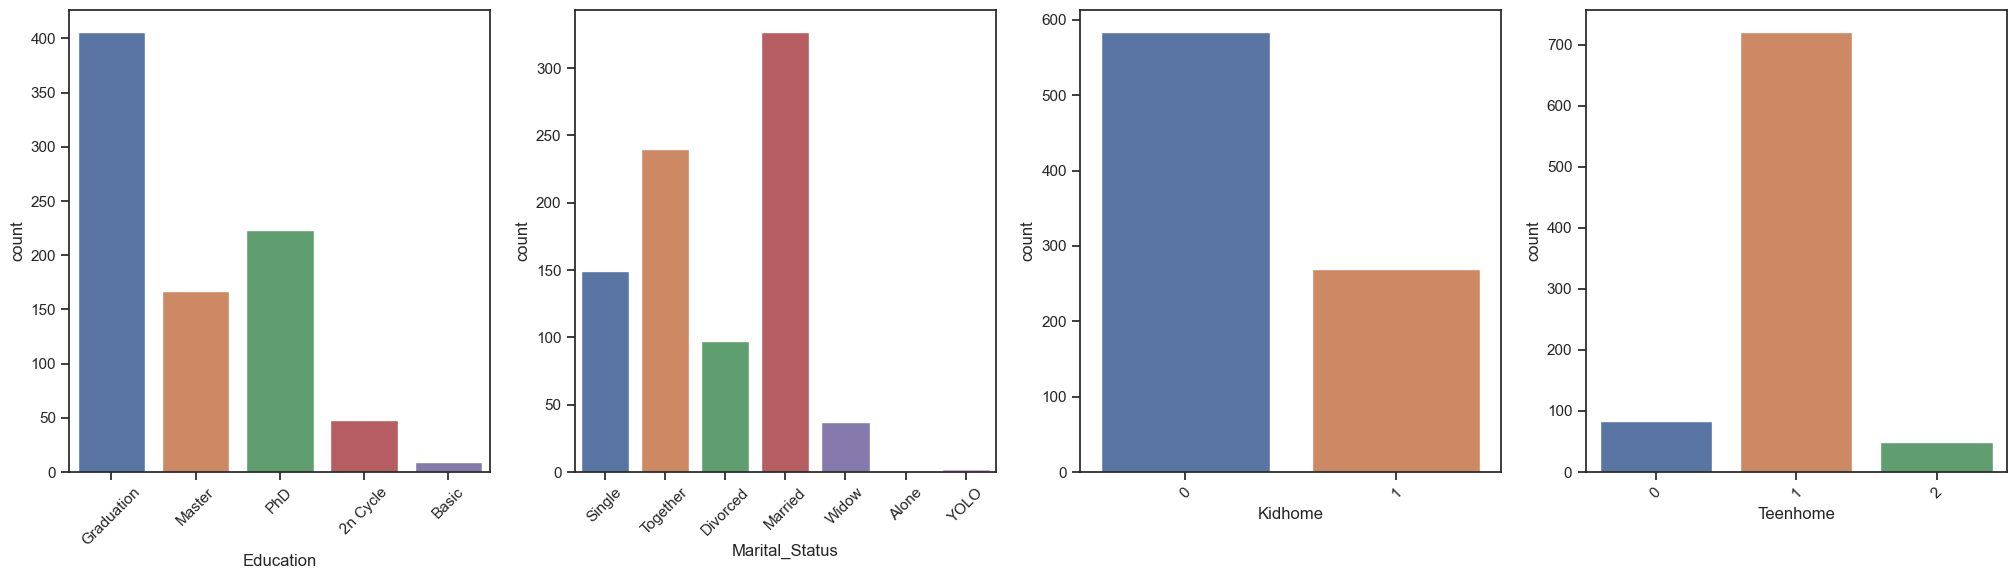

In [27]:
cluster2_df = df[df['Cluster_Id'] == 2]

fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=cluster2_df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

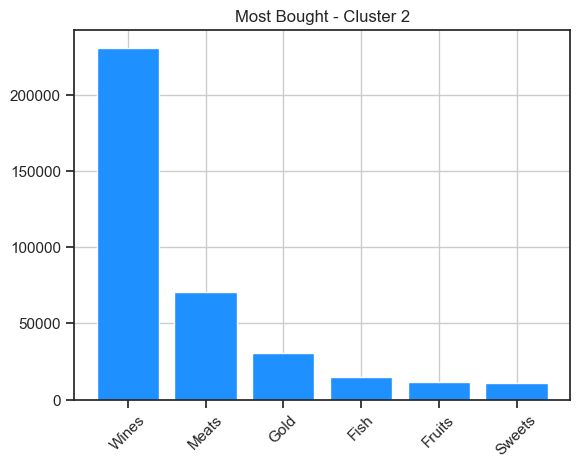

In [28]:
col_sum = cluster2_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=0).sort_values(ascending=False)

plt.bar(col_sum.index, col_sum.values, color='dodgerblue')
plt.title("Most Bought - Cluster 2")
plt.xticks(col_sum.index,['Wines', 'Meats', 'Gold', 'Fish', 'Fruits', 'Sweets'],rotation=45)
plt.grid(True)

plt.show()